In [ ]:
from google.colab import files
import zipfile, os


In [ ]:
uploaded = files.upload()
zip_path = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")



Saving final_dataset.zip to final_dataset.zip


Found 1800 images belonging to 10 classes.
Found 450 images belonging to 10 classes.
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1113 - loss: 2.3679 - val_accuracy: 0.1311 - val_loss: 2.2462
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3135 - loss: 2.0883 - val_accuracy: 0.3244 - val_loss: 2.0711
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5235 - loss: 1.7955 - val_accuracy: 0.4022 - val_loss: 1.9337
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5691 - loss: 1.6020 - val_accuracy: 0.3867 - val_loss: 1.8423
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6045 - loss: 1.4421 - val_accuracy: 0.4400 - val_loss: 1.7514
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6379 - loss: 1.3202 - val_accuracy: 0.4422 - val_loss: 1.6981
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6482 - loss: 1.2524 - val_accuracy: 0.4800 - val_loss: 1.6286
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6688 - loss: 1.1503 - val_accuracy: 0.4933 - val_loss: 1.

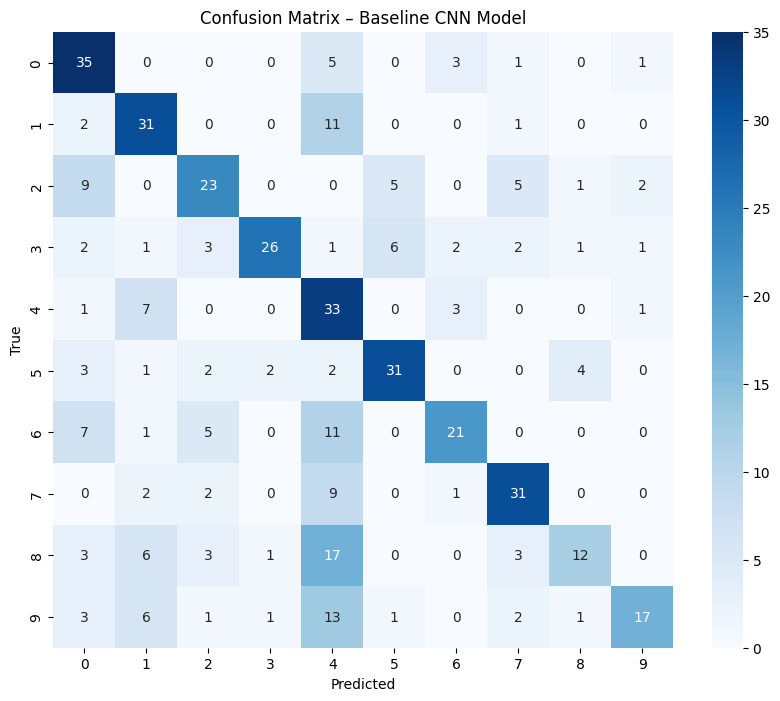

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Basic preprocessing only: no augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

data_path = "final_dataset"

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Minimal baseline model: one conv layer + pooling + output
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=15)

# Evaluation
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes
class_labels = [str(i) for i in range(10)]

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix – Baseline CNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
